In [15]:
import tensorflow as tf
import cv2
import numpy as np
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
import random


In [94]:
img_size = 256
# read dir path
filepaths = []

for i in ["boxes","packages","paper_boxes"]:
    folder = "/Users/tunchiehhsu/Desktop/googliser/googliser/" + i
    for file in os.listdir(folder):
            if file != ".DS_Store":
                filepath = os.path.join(folder, file)
                filepaths.append(filepath)
x_normal = []
for path in filepaths:
    # gray scale
    img = io.imread(path,as_gray = True)
    # reshape to uniform size
    reshape_img = cv2.resize(img, dsize=(img_size, img_size), interpolation=cv2.INTER_CUBIC)
    x_normal.append(reshape_img.flatten())
x_normal = np.array(x_normal) # trans to Array 
# read dir path
filepaths = []
for i in ["broken_boxes","damaged_boxes","damaged_packages","smashed_boxes"]:
    folder = "/Users/tunchiehhsu/Desktop/googliser/googliser/" + i
    for file in os.listdir(folder):
            if file != ".DS_Store":
                filepath = os.path.join(folder, file)
                filepaths.append(filepath)
x_smashed = []
for path in filepaths:
    # gray scale
    img = io.imread(path,as_gray = True)
    # reshape to uniform size
    reshape_img = cv2.resize(img, dsize=(img_size,img_size), interpolation=cv2.INTER_CUBIC)
    x_smashed.append(reshape_img.flatten())
x_smashed = np.array(x_smashed) # trans to Array 

In [95]:
datalist = list(zip(np.ones(len(x_normal)), x_normal)) + list(zip(np.zeros(len(x_normal)), x_smashed))
train_index = random.sample(list(range(590)),int(np.floor(len(datalist) * 0.8)))

train = [datalist[i] for i in train_index]
test = [datalist[i] for i in range(590) if i not in train_index]

# Training Set
Y = []
X = []
for yy,xx in train:
    Y.append(int(yy))
    X.append(xx)
train_xs = np.array(X).astype("float32")
train_ys = np.array(Y).astype("uint8").reshape([-1,1])

# Test Set 
Y = []
X = []
for yy,xx in test:
    Y.append(int(yy))
    X.append(xx)
test_x = np.array(X).astype("float32")
test_y = np.array(Y).astype("uint8").reshape([-1,1])

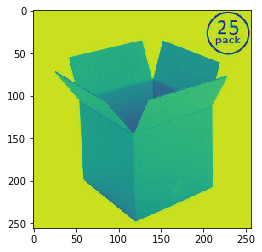

In [77]:
plt.imshow(test_x[20].reshape([256,256]));

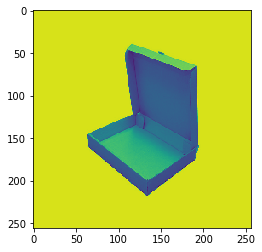

In [79]:
plt.imshow(test_x[21].reshape([256,256]));

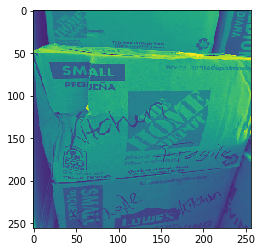

In [100]:
plt.imshow(test_x[-5].reshape([256,256]));

In [102]:
tf.reset_default_graph() # why?

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

new_saver = tf.train.import_meta_graph('./checkpoint_dir/MyModel.meta')
new_saver.restore(sess, tf.train.latest_checkpoint('./checkpoint_dir'))

graph = tf.get_default_graph()
x=graph.get_operation_by_name('xs').outputs[0]
y=tf.get_collection("pred_network")[0]
raw = sess.run(y,feed_dict={x:test_x[-10:-5]})

INFO:tensorflow:Restoring parameters from ./checkpoint_dir/MyModel


In [107]:
raw

array([[9.0646511e-04],
       [2.6339778e-01],
       [6.8198680e-03],
       [1.2780550e-05],
       [4.9130558e-03]], dtype=float32)

In [106]:
train_xs.shape

(472, 65536)

In [108]:
cv2.__version__

'3.4.3'

In [109]:
tf.__version__

'1.10.1'